# pandas
1 pandas的資料結構  
2 pandas的資料工具  
3 規劃和整理資料  
4 分析資料更為快速  
5 pandas的數值處理方法非常類似於Numpy和Scipy  
6 pandas也是使用array 導向方式處理資料  
7 numpy專門處理相同數值的array資料  
8 pandas專門處理不同資料型態的表格資料  

In [ ]:
#一般我們使用pandas的語法如下
import pandas as pd

#如果要直接將Series,DataFrame載入到現在使用的命名空間
from pandas import Series, DataFrame

## pandas的資料結構
1.Series  
2.DataFrame  


## Series
- 類似一個一維的陣列(相似於numpy),但還包含了一些對應資料的符號(index)  

In [ ]:
#pd.Series()
#屬性values
#屬性index

import pandas as np


#Seriese -> 類似一個一維的陣列(相似於numpy),但還包含了一些對應資料的符號(index)
obj = pd.Series([4, 7, -5, 3])
obj

#下面左邊是index,右邊的是值.沒有特定指定索引將會採用0 ~ N-1的值(N是這資料的長度)。
'''
Out[23]: 
0    4
1    7
2   -5
3    3
dtype: int64
'''


#使用values的屬性取出numpy的ndarray
obj.values
'''
Out[24]: array([ 4,  7, -5,  3])
'''

#使用index屬性取出index物件
obj.index
#Out[25]: RangeIndex(start=0, stop=4, step=1)



In [ ]:
#pd.Series(,index=)
#自定Series索引的label
import pandas as pd

obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2
'''
In [27]: obj2                                                                   
Out[27]: 
d    4
b    7
a   -5
c    3
dtype: int64
'''

#使用index屬性取出索引物件
obj2.index
#Out[28]: Index(['d', 'b', 'a', 'c'], dtype='object')


#和numpy不同是，我們可以使用索引的label取出值來
obj2['a']
# output -5

#修改值
obj2['d'] = 6
obj2
'''
Out[30]: 
d    6
b    7
a   -5
c    3
dtype: int64
'''

#使用list取出多個值
obj2[['c', 'a', 'd']]
'''
Out[31]: 
c    3
a   -5
d    6
dtype: int64
'''

In [ ]:
import pandas as pd

#使用類似numpy的運算元操作
obj2 = pd.Series([80, 90, 75, 65], index=['chinese', 'english', 'math', 'history'])
obj2
'''
Out[34]: 
chinese    80
english    90
math       75
history    65
dtype: int64
'''

#使用boolean array過濾資料
obj2[obj2 >= 80]
'''
Out[33]: 
chinese    80
english    90
dtype: int64
'''

#使用和純值的運算
obj2 * 1.1
'''
Out[35]: 
chinese    88.0
english    99.0
math       82.5
history    71.5
dtype: float64
'''

#可以使用numpy的數學函式
#自然常数e为底的指数函数
#e=2.71828182846
import numpy as np
obj2 = pd.Series([4, 7, -5, 3], index =['d', 'b', 'a', 'c'])
np.exp(obj2)
'''
Out[36]: 
d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64
'''


In [ ]:
#有時可以想像Series是一個固定長度,可以排序的Dictionary
import pandas as pd

obj2 = pd.Series([80, 90, 75, 65], index=['chinese', 'english', 'math', 'history'])

#使用 in 運算元
#記住是索引

'chinese' in obj2
#Out[41]: True

'graphic' in obj2
#Out[40]: False

In [ ]:
#由於類似Dictionary, 所以也可以使用Dictionary來建立Series
sdata = {'台北':35000, '桃園':71000, '台中':16000, '高雄':5000}
obj3 = pd.Series(sdata)
obj3
'''
Out[44]: 
台北    35000
桃園    71000
台中    16000
高雄     5000
dtype: int64
'''

<BarContainer object of 4 artists>

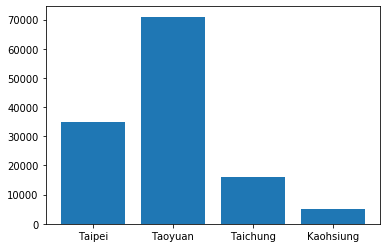

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
sdata = {'Taipei':35000, 'Taoyuan':71000, 'Taichung':16000, 'Kaohsiung':5000}
obj3 = pd.Series(sdata)
obj3
values = obj3.values
index = obj3.index
plt.bar(index, values)

In [ ]:
#使用 index 引數名稱,排序資料
sdata = {'台北':35000, '桃園':71000, '台中':16000, '高雄':5000}
states = ['花蓮','高雄', '台中', '台北']
obj4 = pd.Series(sdata, index=states)


obj4
'''
Out[48]: 
花蓮        NaN
高雄     5000.0
台中    16000.0
台北    35000.0
dtype: float64
'''

#使用pd的isnull()和notnull()functions
pd.isnull(obj4)
'''
In [50]: pd.isnull(obj4)                                                        
Out[50]: 
花蓮     True
高雄    False
台中    False
台北    False
dtype: bool
'''

pd.notnull(obj4)
'''
Out[51]: 
花蓮    False
高雄     True
台中     True
台北     True
dtype: bool
'''

#使用Series的method()
obj4.isnull()
'''
Out[52]: 
花蓮     True
高雄    False
台中    False
台北    False
dtype: bool
'''

In [ ]:
#2個Series在做數學運算時,會依照索引來做運算

sdata = {'台北':35000, '桃園':71000, '台中':16000, '高雄':5000}
obj3 = pd.Series(sdata)
obj3
'''
Out[53]: 
台北    35000
桃園    71000
台中    16000
高雄     5000
dtype: int64
'''

sdata = {'台北':35000, '桃園':71000, '台中':16000, '高雄':5000}
states = ['花蓮','高雄', '台中', '台北']
obj4 = pd.Series(sdata, index=states)
obj4
'''
Out[55]: 
花蓮        NaN
高雄     5000.0
台中    16000.0
台北    35000.0
dtype: float64
'''

#NaN + 值會得到NaN
obj3 + obj4
'''
Out[56]: 
台中    32000.0
台北    70000.0
桃園        NaN
花蓮        NaN
高雄    10000.0
dtype: float64
'''

In [ ]:
#屬性series.name
#屬性series.index.name

#Series物件和index有各自的name屬性
sdata = {'台北':35000, '桃園':71000, '台中':16000, '高雄':5000}
states = ['花蓮','高雄', '台中', '台北']
obj4 = pd.Series(sdata, index=states)

obj4.name = '縣市人口'
obj4.index.name = '縣市'
obj4
'''
Out[60]: 
縣市
花蓮        NaN
高雄     5000.0
台中    16000.0
台北    35000.0
Name: 縣市人口, dtype: float64
'''

In [ ]:
#Series的index物件可以被更換的
obj = pd.Series([4, 7, -5, 3])
'''
Out[62]: 
0    4
1    7
2   -5
3    3
dtype: int64
'''

obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj
'''
Out[64]: 
Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64
'''

- homework1   
    1 將'新北市食品工廠清冊.csv',轉換為Series  
    2 將索引名改為「統一編號」  
    3 將Series名改為「工廠統編清冊」  
    
```
Out[1]: 
統一編號
99611344             鴻輝食品廠
99604192       廣達香食品股份有限公司
99613990             順發糧食行
99600477      台灣塩野香料股份有限公司
99606467      圓金釀造食品股份有限公司
                 ...      
65007117    元茂農產企業股份有限公司二廠
65007172         萬寶客股份有限公司
65007211          昆帝食品有限公司
65007246       嚐鱻食品有限公司板橋廠
65007247          崴欣國際有限公司
Name: 工廠統編清冊, Length: 1232, dtype: object
```




    4 排序索引  

```
統一編號
01000070           小潘蛋糕坊
01000084    國鼎生物科技股份有限公司
01000112        大新食品有限公司
01000119        佑善生技有限公司
01000129        松村實業有限公司
                ...     
T6500641         普光傳統豆腐店
T6500647           山井食品行
T6500656           柏源盛商行
T6500666         名品客家美食行
T6500672        台品興業有限公司
Name: 工廠統編清冊, Length: 1232, dtype: object
```



    5 取出'0100070'~'0101000'的廠商
```
Out[5]: 
統一編號
01000070           小潘蛋糕坊
01000084    國鼎生物科技股份有限公司
01000112        大新食品有限公司
01000119        佑善生技有限公司
01000129        松村實業有限公司
01000181     滿盈食品有限公司五股廠
01000202       威斯登食品有限公司
01000203       金軒揚食品有限公司
01000231    承恩食品企業股份有限公司
01000235         耕耘川有限公司
01000241           洪記食品行
01000260       小南門食品有限公司
Name: 工廠統編清冊, dtype: object
```
[解題](https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/%E5%88%9D%E8%A6%8Bpandas/homework1.ipynb)

## DataFrame
- DataFrame可以展示表格資料  
- DataFrame有columns,每個column可以有不同的資料型態(數值,字串,布林)  
- DataFrame有2個index,一個是row的index,一個是column的index  
- 可以想像很多有相同index的Series,組成DataFrame,每個Series有自已的column索引

In [ ]:
#pd.DataFrame()
#實體.head()

#有非常多種方式可以建立DataFrame,最常用的是Dictionary,然後key當作column的索引,list當作value
data = {
    '縣市': ['台北','台北','台北', '新竹', '新竹', '新竹'],
    '年份': [2000, 2001, 2002, 2001, 2002, 2003],
    '人口': [2.2, 2.5, 2.7, 1.1, 1.5, 2.0]
}

#會自動產生row的index
frame = pd.DataFrame(data)
frame
'''
Out[67]: 
   縣市    年份   人口
0  台北  2000  2.2
1  台北  2001  2.5
2  台北  2002  2.7
3  新竹  2001  1.1
4  新竹  2002  1.5
5  新竹  2003  2.0
'''


#有時資料會非常多,如果要只看前面幾筆,可以使用head()方法,只顯示前面幾筆
#head()
frame.head()
'''
Out[68]: 
   縣市    年份   人口
0  台北  2000  2.2
1  台北  2001  2.5
2  台北  2002  2.7
3  新竹  2001  1.1
4  新竹  2002  1.5
'''

In [ ]:
#pd.DataFrame(,columns=)
#如果指定引數名稱columns,則DataFrame欄位名稱將依照columns的順序排列
data = {
    '縣市': ['台北','台北','台北', '新竹', '新竹', '新竹'],
    '年份': [2000, 2001, 2002, 2001, 2002, 2003],
    '人口': [2.2, 2.5, 2.7, 1.1, 1.5, 2.0]
}

pd.DataFrame(data, columns=['年份','人口', '縣市'])
'''
Out[69]: 
     年份   人口  縣市
0  2000  2.2  台北
1  2001  2.5  台北
2  2002  2.7  台北
3  2001  1.1  新竹
4  2002  1.5  新竹
5  2003  2.0  新竹
'''

In [ ]:
#pd.DataFrame(,columns=,index=)
#屬性columns

#dataFrame['欄位索引']
#屬性dataFrame.欄位索引

#dataFrame['列索引','欄位索引'](錯誤語法,但numpy可以)

#如果傳遞的columns,沒有包含在data的key內,則會產生遺失的value
data = {
    '縣市': ['台北','台北','台北', '新竹', '新竹', '新竹'],
    '年份': [2000, 2001, 2002, 2001, 2002, 2003],
    '人口': [2.2, 2.5, 2.7, 1.1, 1.5, 2.0]
}

frame2 = pd.DataFrame(data, 
                      columns=['年份', '縣市', '人口', '負債'], 
                      index=['one', 'two', 'three', 'foru', 'five', 'six'])
frame2
'''
Out[70]: 
         年份  縣市   人口   負債
one    2000  台北  2.2  NaN
two    2001  台北  2.5  NaN
three  2002  台北  2.7  NaN
foru   2001  新竹  1.1  NaN
five   2002  新竹  1.5  NaN
six    2003  新竹  2.0  NaN
'''

#使用columns屬性,取出columns的索引
frame2.columns
#Out[71]: Index(['年份', '縣市', '人口', '負債'], dtype='object')

#可以取出DataFrame的一個欄位,將會傳出Series
frame2['縣市']
'''
Out[72]: 
one      台北
two      台北
three    台北
foru     新竹
five     新竹
six      新竹
Name: 縣市, dtype: object
'''
#也可以屬性的方式,取出column
frame2.人口
'''
Out[73]: 
one      2.2
two      2.5
three    2.7
foru     1.1
five     1.5
six      2.0
Name: 人口, dtype: float64
'''

#frame2['縣市']語法可以有不同的語法
#frame2.人口 點的語法,只有一個功能,取出人口欄位
#取出的Series的name屬性會使用欄位名稱


In [ ]:
#loc[索引名稱]
#可以使用loc的屬性,傳入位置或索引名稱取出rows
data = {
    '縣市': ['台北','台北','台北', '新竹', '新竹', '新竹'],
    '年份': [2000, 2001, 2002, 2001, 2002, 2003],
    '人口': [2.2, 2.5, 2.7, 1.1, 1.5, 2.0]
}

frame2 = pd.DataFrame(data, columns=['年份', '縣市', '人口', '負債'], index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2
'''
Out[76]: 
         年份  縣市   人口   負債
one    2000  台北  2.2  NaN
two    2001  台北  2.5  NaN
three  2002  台北  2.7  NaN
four   2001  新竹  1.1  NaN
five   2002  新竹  1.5  NaN
six    2003  新竹  2.0  NaN
'''

#loc[索引名稱]
frame2.loc['three']
'''
Out[77]: 
年份    2002
縣市      台北
人口     2.7
負債     NaN
Name: three, dtype: object
'''

#可以使用指定運算子,改變裏面的值
frame2['負債'] = 16.5
frame2
'''
Out[78]: 
         年份  縣市   人口    負債
one    2000  台北  2.2  16.5
two    2001  台北  2.5  16.5
three  2002  台北  2.7  16.5
four   2001  新竹  1.1  16.5
five   2002  新竹  1.5  16.5
six    2003  新竹  2.0  16.5
'''

frame2['負債'] = np.arange(6.)
frame2
'''
Out[79]: 
         年份  縣市   人口   負債
one    2000  台北  2.2  0.0
two    2001  台北  2.5  1.0
three  2002  台北  2.7  2.0
four   2001  新竹  1.1  3.0
five   2002  新竹  1.5  4.0
six    2003  新竹  2.0  5.0
'''

In [ ]:
#當指定是list或array給欄位時,長度必需要和DataFrame欄位的長度一樣
#如果指定的是Series,Series的索引會對應DataFrame欄位的索引,如果是DataFrame沒有的索引,則會自動補上NaN的值
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['負債'] = val
frame2
'''
Out[81]: 
         年份  縣市   人口   負債
one    2000  台北  2.2  NaN
two    2001  台北  2.5 -1.2
three  2002  台北  2.7  NaN
four   2001  新竹  1.1 -1.5
five   2002  新竹  1.5 -1.7
six    2003  新竹  2.0  NaN
'''

In [ ]:
#如果指定的欄位名稱是沒有出現過的,則代表新增一個欄位

frame2['新開發區'] = frame2.縣市 == '新竹'
frame2
'''
Out[82]: 
         年份  縣市   人口   負債   新開發區
one    2000  台北  2.2  NaN  False
two    2001  台北  2.5 -1.2  False
three  2002  台北  2.7  NaN  False
four   2001  新竹  1.1 -1.5   True
five   2002  新竹  1.5 -1.7   True
six    2003  新竹  2.0  NaN   True
'''
#注意新增不可以使用點運算子的方法. frame2.新開發區 = xxxx

In [ ]:
# del運算子,可以刪除欄位,操作方式和dictionary
del frame2['新開發區']
frame2
'''
Out[83]: 
         年份  縣市   人口   負債
one    2000  台北  2.2  NaN
two    2001  台北  2.5 -1.2
three  2002  台北  2.7  NaN
four   2001  新竹  1.1 -1.5
five   2002  新竹  1.5 -1.7
six    2003  新竹  2.0  NaN
'''

In [ ]:
#注意[索引]方式,取出的Columns是個View,而不是copy一份出來,如果是要取出是獨立的一份,請使用Series的copy()方法
copyFrame = frame2['人口'].copy()
copyFrame['one'] = 3.0
copyFrame
'''
Out[84]: 
one      3.0
two      2.5
three    2.7
four     1.1
five     1.5
six      2.0
Name: 人口, dtype: float64
'''

frame2.人口
'''
Out[86]: 
one      2.2
two      2.5
three    2.7
four     1.1
five     1.5
six      2.0
Name: 人口, dtype: float64
'''

In [ ]:
#另一種常見方式是建立巢狀的Dictionary
#如果使用巢狀的Dictionary,外面的key當作Column的索引,裏面的key當作row的索引
pop = {'台北':{2001:2.4, 2002:2.9},
      '高雄':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = pd.DataFrame(pop)
frame3
'''
Out[87]: 
       台北   高雄
2001  2.4  1.7
2002  2.9  3.6
2000  NaN  1.5
'''

In [ ]:
#可以調換欄和列的位置,使用和numpy一樣的語法
frame4 = frame3.T
frame4
'''
Out[88]: 
    2001  2002  2000
台北   2.4   2.9   NaN
高雄   1.7   3.6   1.5
'''

In [ ]:
#指定特定的columns可以重新排序新的位置
frame4.columns = [2000 ,2001, 2002]
frame4
'''
Out[89]: 
    2000  2001  2002
台北   2.4   2.9   NaN
高雄   1.7   3.6   1.5
'''

#也可以在建立時就使用引數名稱index直接排序
pop = {'台北':{2001:2.4, 2002:2.9},
      '高雄':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = pd.DataFrame(pop, index=[2001, 2002, 2003])
frame3

'''
Out[90]: 
       台北   高雄
2001  2.4  1.7
2002  2.9  3.6
2003  NaN  NaN
'''

In [ ]:
#dataFrame.index.name=
#dataFrame.columns.name=
#可以使用name屬設定DataFrame的欄位名稱和索引名稱
frame3.index.name = "年份"
frame3.columns.name = "縣市"
frame3
'''
Out[91]: 
縣市     台北   高雄
年份            
2001  2.4  1.7
2002  2.9  3.6
2003  NaN  NaN
'''

In [ ]:
#使用values屬性取出ndArray
frame3.values
'''
Out[92]: 
array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, nan]])
'''

In [1]:
#練習建立學生成績單
import numpy as np
import pandas as pd

scores = np.random.randint(50,101,size=(50,5))
scores_pd=pd.DataFrame(scores,columns=['國文', '英文', '數學', '地理', '歷史'],index=range(1,51))
scores_pd.index.name="學號"
scores_pd.columns.name="科目"
scores_pd

科目,國文,英文,數學,地理,歷史
學號,,,,,
1,99,88,80,56,50
2,86,72,67,66,84
3,81,84,77,50,98
4,80,53,75,100,62
5,100,80,72,50,90
6,92,84,72,86,54
7,63,82,78,99,74
8,79,96,53,87,92
9,75,74,75,82,77


In [2]:
#練習建立學生成績單
#一直列(整欄)
scores_pd.sum()

科目
國文    3742
英文    3722
數學    3736
地理    3818
歷史    3746
dtype: int64

In [3]:
#練習建立學生成績單
#1號學生的總分
scores_pd.loc[1].sum()

373

In [4]:
#練習建立學生成績單
#1號學生的平均
scores_pd.loc[1].mean()

74.6

In [5]:
#練習建立學生成績單
#建立總分和平均
sum_values = scores_pd.sum(axis=1)
avg_values = scores_pd.mean(axis=1)
scores_pd['總分'] = sum_values
scores_pd['平均'] = avg_values
scores_pd

科目,國文,英文,數學,地理,歷史,總分,平均
學號,,,,,,,
1,99,88,80,56,50,373,74.6
2,86,72,67,66,84,375,75.0
3,81,84,77,50,98,390,78.0
4,80,53,75,100,62,370,74.0
5,100,80,72,50,90,392,78.4
6,92,84,72,86,54,388,77.6
7,63,82,78,99,74,396,79.2
8,79,96,53,87,92,407,81.4
9,75,74,75,82,77,383,76.6


## pandas和Series 的 Index物件
- index物件將對應到matpoltlib圖表的軸  
- 如果要以圖表顯示,必需注意到column和index內所儲存的值  

In [ ]:
import numpy as np
import pandas as pd

obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index
#Out[93]: Index(['a', 'b', 'c'], dtype='object')
index[1:]
#Out[94]: Index(['b', 'c'], dtype='object')

In [ ]:
#index是不可變的內容
#index[1] = 'd' # typeError

In [ ]:
#pd.Index()
#使用pd.Index建立自訂的index
labels = pd.Index(np.arange(3))
labels
#Out[95]: Int64Index([0, 1, 2], dtype='int64')

obj2 = pd.Series([1.5, -2.5, 0], index = labels)
obj2
'''
Out[96]: 
0    1.5
1   -2.5
2    0.0
dtype: float64
'''

In [ ]:
pop = {'台北':{2001:2.4, 2002:2.9},
      '高雄':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = pd.DataFrame(pop, index=[2000, 2001, 2002])
frame3
'''
Out[97]: 
       台北   高雄
2000  NaN  1.5
2001  2.4  1.7
2002  2.9  3.6

'''

In [ ]:
#index物件除了像ndarra外,也很像固定的set
#可以使用 in 運算子

frame3.columns
#Out[98]: Index(['台北', '高雄'], dtype='object')

'台北' in frame3.columns
#Out[99]: True

'新竹' in frame3.columns
#Out[100]: False

In [18]:
#pandas的index物件內容是可以有重複值的
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels
#Out[101]: Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

 - homework2   
 將'新北市食品工廠清冊.csv',轉換為DataFrame  
 
 
 ```
 Out[6]: 
                  工廠    工廠登記編號  ...                緯度                經度      
0              鴻輝食品廠  99611344  ...  121.448618091317  25.0327031220478    
1        廣達香食品股份有限公司  99604192  ...  121.467221414508    25.04990297127     
2              順發糧食行  99613990  ...  121.460503814584  25.0101125037041    
3       台灣塩野香料股份有限公司  99600477  ...  121.465686254094  25.0467418103903    
4       圓金釀造食品股份有限公司  99606467  ...  121.431057250618  25.0140290966789    
...              ...       ...  ...               ...               ...   
1227  元茂農產企業股份有限公司二廠  65007117  ...  121.457392108499  25.0655922866113   
1228       萬寶客股份有限公司  65007172  ...  121.474607439816   25.073781780003    
1229        昆帝食品有限公司  65007211  ...  121.456297513558  25.0681166276338    
1230     嚐鱻食品有限公司板橋廠  65007246  ...  121.461790748796  24.9919141131402    
1231        崴欣國際有限公司  65007247  ...  121.489002297811  25.0044487093875    

[1232 rows x 6 columns]   
 ```
 
 [解題](https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/%E5%88%9D%E8%A6%8Bpandas/homework2.ipynb)

- homework3
      1 將「各鄉鎮市區人口密度.csv」轉換為以下的DataFrame  
     
```
Out[7]: 
    統計年     區域別   年底人口數      土地面積   人口密度
0   106  新北市板橋區  551480   23.1373  23835
1   106  新北市三重區  387484    16.317  23747
2   106  新北市中和區  413590    20.144  20532
3   106  新北市永和區  222585    5.7138  38956
4   106  新北市新莊區  416524   19.7383  21102
..  ...     ...     ...       ...    ...
95  106  臺南市學甲區   26078   53.9919    483
96  106  臺南市西港區   24758   33.7666    733
97  106  臺南市七股區   22974  110.1492    209
98  106  臺南市將軍區   19849   41.9796    473
99  106  臺南市北門區   11188   44.1003    254

[100 rows x 5 columns]

```
    2 注意事項  
![注意](note1.png)


[解題](https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/%E5%88%9D%E8%A6%8Bpandas/homework3.ipynb)

- homework4  
    1 將「新北市公共自行車租賃系統.json」轉換成DataFrame如下圖所示   
    
```
Out[1]:   
       編號   區域        站名  ...  可還         緯度          經度  
0    1001  新店區      大鵬華城  ...  13   24.99116   121.53398  
1    1002  汐止區     汐止火車站  ...  54  25.068914  121.662748  
2    1003  汐止區     汐止區公所  ...  28  25.064162  121.658301  
3    1004  汐止區    國泰綜合醫院  ...  34   25.07315  121.662555  
4    1005  新店區      裕隆公園  ...  37  24.979649  121.546319  
..    ...  ...       ...  ...  ..        ...         ...  
598  1702  五股區  成泰路4段22巷  ...  19  25.108260  121.455960  
599  1706  金山區       中角灣  ...  14  25.239000  121.632340  
600  1709  中和區     捷運景安站  ...  49  24.993520  121.504720  
601  1710  林口區    林口婦幼公園  ...  19  25.072310  121.377520  
602  1713  板橋區      埤墘公園  ...  17  25.023320  121.474220  

[603 rows x 9 columns]  
  
```

    2 取出「汐止區」所有的資料
    
    
```
Out[2]: 
       編號   區域           站名  ...  可還          緯度           經度  
1    1002  汐止區        汐止火車站  ...  54   25.068914   121.662748  
2    1003  汐止區        汐止區公所  ...  28   25.064162   121.658301  
3    1004  汐止區       國泰綜合醫院  ...  34    25.07315   121.662555  
6    1007  汐止區     汐科火車站(北)  ...  15   25.064106   121.653019  
10   1011  汐止區         樟樹國小  ...  23   25.066688   121.640367  
11   1012  汐止區         金龍國小  ...  49     25.0688   121.628908  
12   1013  汐止區         白雲國小  ...  34   25.047578   121.618888  
13   1014  汐止區     東勢宜興活動中心  ...  39   25.039031   121.624333  
23   1024  汐止區         原興廣場  ...  36   25.065042   121.633149  
24   1025  汐止區       文化白雲公園  ...  70   25.056875   121.655207  
30   1031  汐止區         金龍公園  ...  17   25.069473  121.631525  
50   1051  汐止區         保長公園  ...  38  25.079523   121.674342  
56   1057  汐止區       東方科學園區  ...  34   25.061262   121.649512  
57   1058  汐止區       連興龍安路口  ...  45   25.062989   121.654430  
58   1059  汐止區      青山國民中小學  ...  26   25.061034   121.655586  
59   1060  汐止區     汐止區綜合運動場  ...  27   25.066238   121.659067  
60   1061  汐止區         汐止公園  ...  30   25.067682   121.659763  
62   1063  汐止區       台灣科學園區  ...  29   25.057900   121.634899  
65   1066  汐止區       雍和科學園區  ...  30   25.058078   121.626018  
123  1124  汐止區        五堵火車站  ...  48   25.077493   121.666869  
149  1150  汐止區    橋東里(忠孝東路)  ...  12   25.073682   121.666257  
155  1156  汐止區         北港國小  ...  20   25.089027   121.645946  
208  1209  汐止區     崇德橋東活動中心  ...  14   25.070512   121.667002  
266  1267  汐止區         南興公園  ...  22   25.059779   121.652549  
288  1289  汐止區     忠山市民活動中心  ...  10   25.078202   121.624493  
306  1307  汐止區     仁愛路151巷口  ...  37   25.064819   121.663885  
342  1343  汐止區     汐科火車站(南)  ...  51   25.062884   121.646597  
393  1395  汐止區     民族二街明峰街口  ...   7   25.071049   121.635015  
395  1402  汐止區     世貿國家公園社區  ...  16   25.072887   121.658646  
399  1406  汐止區      工建樟樹一路口  ...  25   25.063062   121.641033  
422  1429  汐止區         崇德國小  ...  22   25.069378   121.669788  
453  1460  汐止區        蘭庭序大廈  ...  12   25.072070   121.652070  
564  1656  汐止區      康寧街307巷  ...  32   25.068090   121.626970  
568  1660  汐止區         康福公園  ...  16   25.068940   121.637480  
575  1668  汐止區     汐止火車站停車場  ...  50   25.067950   121.661680  
593  1695  汐止區  長安橋(吉祥街12巷)  ...  23   25.080330   121.668460  

[36 rows x 9 columns]  
```

    3.目前新北市youbyte總數    
    
```
可停車總數是為: 1724
```

    4.計算目前可借車總數為  
```
可借車總數是為 636 
```

    5.計算目前可還車總數為  
```
可還車總數為: 1075
```


[解題](https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/%E5%88%9D%E8%A6%8Bpandas/homework4.ipynb)